In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error

In [2]:
t = np.linspace(0,20*pi,1000)
x = t*np.sin(t)

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

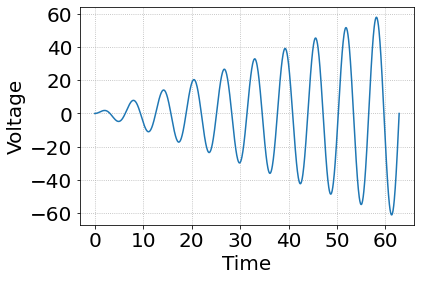

In [3]:
plt.grid(linestyle='dotted')
plt.plot(t,x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test1_input.jpg", dpi = 300, bbox_inches='tight')

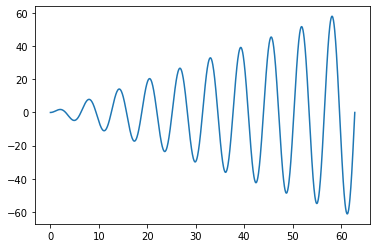

In [4]:
plt.plot(t,x)

In [5]:
dx = fd._differentiate(x, t)

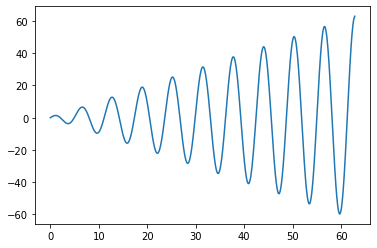

In [6]:
plt.plot(t,dx)

In [7]:
mdx = np.abs(dx)

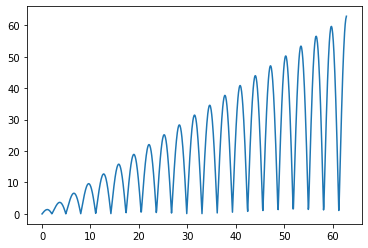

In [8]:
plt.plot(t, mdx)

In [9]:
def model(y, t):
    dydt = 1*np.abs(t*np.cos(t) + np.sin(t))*t*np.sin(t) - 0.25 * np.abs(t*np.cos(t) + np.sin(t))*y + 20*(t*np.cos(t) + np.sin(t))
    return dydt

In [10]:
y0 = 0
y = odeint(model, y0, t)

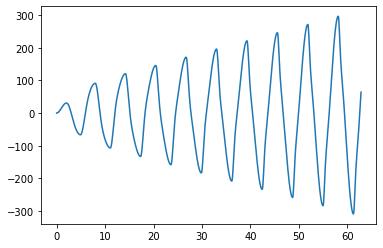

In [11]:
plt.plot(t,y)

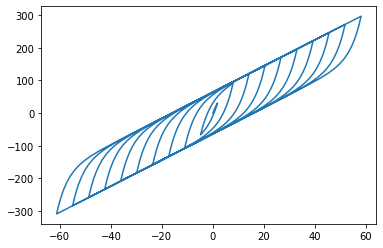

In [12]:
plt.plot(x, y)

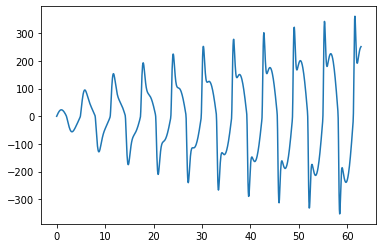

In [13]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

In [14]:
my = np.abs(y)
my = my.reshape(-1,)

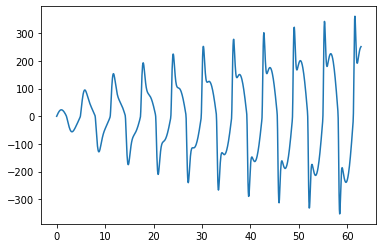

In [15]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
#terms = t1-0.5*t2-2*t3
#plt.plot(t,terms)
plt.plot(t, dy)

In [16]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [17]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 19.846 x2 + -0.247 x0 x3 + 0.990 x1 x3
(x1)' = 1.000 x2
(x2)' = -0.999 x1
(x3)' = 1.003 1
(x4)' = 52.035 1 + -14.581 x3 + -0.387 x4 + 0.252 x0 x2 + -0.877 x1 x2


In [18]:
c1 = 19.846
c2 = -0.247
c3 = 0.990
def test_model(y, t):
    dydt = c3*np.abs(t*np.cos(t) + np.sin(t))*t*np.sin(t) + c2* np.abs(t*np.cos(t) + np.sin(t))*y + c1*(t*np.cos(t) + np.sin(t))
    return dydt

In [19]:
ytest_0 = 0
y_test1 = odeint(test_model, ytest_0, t)

In [20]:
c1 = 20
c2 = -0.25
c3 = 1
y_truth = odeint(test_model, ytest_0, t)

In [21]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test1 - y_truth)**2)/np.mean(y_truth**2)
print("Relative Error Test SINDy: ", relative_error_test*100, "%")

Relative Error Test SINDy:  0.0008392960363095107 %


In [22]:
t1=t1.reshape(-1,1)
t2=t2.reshape(-1,1)
t3=t3.reshape(-1,1)
Y = np.concatenate((t1, t2, t3), axis=1)
Y.shape
dy = dy.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [24]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 3.75433777 -0.02408428  0.02583851]]
[-0.29136214]


In [25]:
c1 = 3.7543
c2 = -0.024
c3 = 0.025
def test_model(y, t):
    dydt = c1*(t*np.cos(t) + np.sin(t)) + c2*np.abs(t*np.cos(t) + np.sin(t))*y + c3*(t*np.cos(t) + np.sin(t))*np.abs(y)
    return dydt

In [26]:
ytest_0 = 0
y_test2 = odeint(test_model, ytest_0, t)

In [27]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test2 - y)**2)/np.mean(y**2)
print("Relative Error Test Ridge: ", relative_error_test*100, "%")

Relative Error Test Ridge:  6.410706548497728 %


In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

In [29]:
linreg.coef_

array([[ 3.75436251, -0.02408424,  0.02583831]])

In [30]:
linreg.intercept_

array([-0.2913684])

In [31]:
c1 = 3.754
c2 = -0.024
c3 = 0.025
def test_model(y, t):
    dydt = c1*(t*np.cos(t) + np.sin(t)) + c2*np.abs(t*np.cos(t) + np.sin(t))*y + c3*(t*np.cos(t) + np.sin(t))*np.abs(y)
    return dydt

In [32]:
ytest_0 = 0
y_test3 = odeint(test_model, ytest_0, t)

In [33]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test3 - y)**2)/np.mean(y**2)
print("Relative Error Test Lin reg: ", relative_error_test*100, "%")

Relative Error Test Lin reg:  6.410994047482374 %


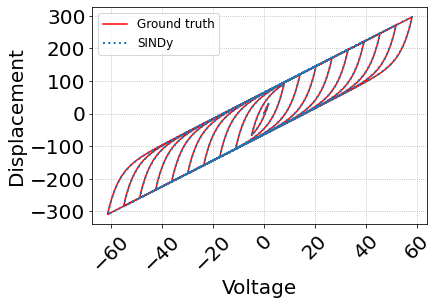

In [39]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test1, linewidth=2, linestyle=':')
#plt.plot(x, y_test2, linewidth=2, linestyle=':')
#plt.plot(x, y_test3, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'SINDy'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide12_loop.png", dpi=1000,bbox_inches='tight')

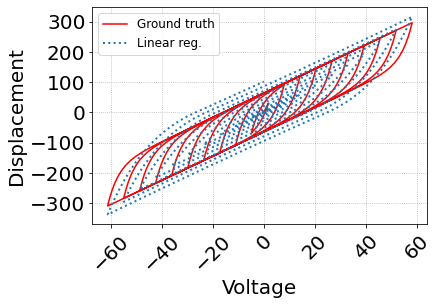

In [40]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
#plt.plot(x, y_test1, linewidth=2, linestyle=':')
plt.plot(x, y_test2, linewidth=2, linestyle=':')
#plt.plot(x, y_test3, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Linear reg.'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide12_loop2.png", dpi=1000,bbox_inches='tight')

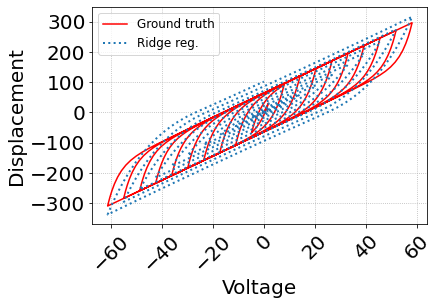

In [41]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
#plt.plot(x, y_test1, linewidth=2, linestyle=':')
#plt.plot(x, y_test2, linewidth=2, linestyle=':')
plt.plot(x, y_test3, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Ridge reg.'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide12_loop3.png", dpi=1000,bbox_inches='tight')

In [ ]:
kkk

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
# Random Seed for dataset generation
sampling_seed = 78
torch.manual_seed(sampling_seed)

# Number of training samples
n_samples = 1000

x = X_train
y = y_train
y = y.reshape(-1,1)

x = x.astype(np.float32)
y = y.astype(np.float32)

x = torch.from_numpy(x)
y = torch.from_numpy(y)

batch_size = n_samples
training_set = DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=batch_size, shuffle=True)

In [ ]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)

def NeuralNet_Seq(input_dimension, output_dimension, n_hidden_layers, neurons):
    modules = list()
    modules.append(nn.Linear(input_dimension, neurons))
    modules.append(nn.Tanh())
    for _ in range(n_hidden_layers):
        modules.append(nn.Linear(neurons, neurons))
        modules.append(nn.Tanh())
    modules.append(nn.Linear(neurons, output_dimension))
    model =  nn.Sequential(*modules)
    return model

  


In [ ]:
# Model definition
my_network = NeuralNet(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)
# my_network = NeuralNet_Seq(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)

In [ ]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
# Model definition

# Predict network value of x
print(my_network(x))

In [ ]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [ ]:
def fit(model, training_set, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (x_train_, u_train_) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                u_pred_ = model(x_train_)
                # Item 1. below
                loss = torch.mean((u_pred_.reshape(-1, ) - u_train_.reshape(-1, ))**p)
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [ ]:
n_epochs = 1000
history = fit(my_network, training_set, n_epochs, optimizer_, p=2, verbose=True )

In [ ]:
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1,n_epochs+1), np.log10(history), label="Train Loss")
plt.legend()

In [ ]:
X_test = X_test.astype(np.float32)
X_test = torch.from_numpy(X_test)

y_test = y_test.astype(np.float32)
y_test = torch.from_numpy(y_test)

y_test_pred = my_network(X_test).reshape(-1,1)

In [ ]:
y_test = y_test.reshape(-1,1)

In [ ]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((y_test_pred - y_test)**2)/torch.mean(y_test**2)
print("Relative Error Test DNN: ", relative_error_test.detach().numpy()*100, "%")

In [ ]:
y_test_pred.shape

In [ ]:
y_test.shape